In [3]:
import numpy as np

In [232]:
def cal_probability_density(x, mu, sigma) -> int:
    return 1 / (2*np.pi*np.sqrt(np.linalg.det(sigma))) \
           * np.exp(-1/2*(x-mu).dot(np.linalg.pinv(sigma)).dot(x-mu).T)
class Model:
    def __init__(self):
        self.ITER = 1

        self.X = np.array([[0.697, 0.460], # 1
                           [0.774, 0.376],
                           [0.634, 0.264],
                           [0.608, 0.318],
                           [0.556, 0.215],
                           [0.403, 0.237],
                           [0.481, 0.149],
                           [0.437, 0.211],
                           [0.666, 0.091],
                           [0.243, 0.267],
                           # [0.245, 0.057], # 11
                           # [0.343, 0.099],
                           # [0.639, 0.161],
                           # [0.657, 0.198],
                           # [0.360, 0.370],
                           # [0.593, 0.042],
                           # [0.719, 0.103],
                           # [0.359, 0.188],
                           # [0.339, 0.241],
                           # [0.282, 0.257],
                           # [0.748, 0.232], # 21
                           # [0.714, 0.346],
                           # [0.483, 0.312],
                           # [0.478, 0.437],
                           # [0.525, 0.369],
                           # [0.751, 0.489],
                           # [0.532, 0.472],
                           # [0.473, 0.376],
                           # [0.725, 0.445],
                           # [0.446, 0.459]
                           ])

        self.cluster_num = 3

        self.sample_num = len(self.X)

        self.Alpha = []
        for _ in range(self.cluster_num):
            self.Alpha.append(1/self.cluster_num)
        self.Alpha = np.array(self.Alpha)

        self.Mu = np.array([self.X[1], self.X[5], self.X[8]])

        self.Sigma = []
        for _ in range(self.cluster_num):
            self.Sigma.append(np.mat([[0.1, 0],[0, 0.1]]))
        self.Sigma = np.array(self.Sigma)

    def cal_P(self):
        P = []
        for x in self.X:
            temp = []
            for i in range(self.cluster_num):
                temp.append(cal_probability_density(x, self.Mu[i], self.Sigma[i]))
            P.append(temp)
        return np.array(P)

    def cal_Gamma(self):
        P = self.cal_P()
        self.Gamma = np.mat(P * self.Alpha) / np.sum(np.mat(P * self.Alpha), axis=1)

    def update_Alpha(self):
        self.Alpha = np.array(self.Gamma.mean(axis=0))[0]

    def update_Mu(self):
        for col in range(self.cluster_num):
            self.Mu[col] = np.sum(self.X * np.array(self.Gamma[:, col]), axis=0) / np.sum(self.Gamma[:, col])

    def update_Sigma(self):
        for cluster in range(self.cluster_num):
            self.Sigma[cluster] = 0
            for sample in range(self.sample_num):
                self.Sigma[cluster] += (np.mat(self.X[sample]) - self.Mu[cluster]).T \
                                        .dot(np.mat(self.X[sample]) - self.Mu[cluster]) \
                                       * self.Gamma[sample, cluster]
            self.Sigma[cluster] = self.Sigma[cluster] / (np.sum(self.Gamma, axis=0)[0, cluster])

    def fit(self):
        for i in range(self.ITER):
            self.cal_Gamma()
            self.update_Alpha()
            self.update_Mu()
            self.update_Sigma()

In [233]:
model = Model()
model.Alpha, model.Mu, model.Sigma

(array([0.33333333, 0.33333333, 0.33333333]),
 array([[0.774, 0.376],
        [0.403, 0.237],
        [0.666, 0.091]]),
 array([[[0.1, 0. ],
         [0. , 0.1]],
 
        [[0.1, 0. ],
         [0. , 0.1]],
 
        [[0.1, 0. ],
         [0. , 0.1]]]))

In [238]:
model.fit()
model.Alpha, model.Mu, model.Sigma, model.Gamma

(array([0.38155984, 0.37704844, 0.24139172]),
 array([[0.65876742, 0.33854393],
        [0.40879695, 0.22346228],
        [0.59821669, 0.18794815]]),
 array([[[ 0.00782341,  0.00620595],
         [ 0.00620595,  0.00869279]],
 
        [[ 0.0139468 , -0.00350734],
         [-0.00350734,  0.00182804]],
 
        [[ 0.00858309, -0.00019903],
         [-0.00019903,  0.00893023]]]),
 matrix([[9.56667024e-01, 5.30472762e-09, 4.33329704e-02],
         [9.04723613e-01, 5.63529479e-06, 9.52707519e-02],
         [5.89322765e-01, 9.48738499e-02, 3.15803385e-01],
         [7.57373700e-01, 1.36770869e-02, 2.28949213e-01],
         [3.03481252e-01, 4.25562637e-01, 2.70956111e-01],
         [1.35964501e-02, 9.00322258e-01, 8.60812915e-02],
         [2.24867604e-01, 4.22105850e-01, 3.53026546e-01],
         [5.94664388e-02, 8.01357115e-01, 1.39176446e-01],
         [6.09879855e-03, 1.17888571e-01, 8.76012631e-01],
         [7.22863178e-07, 9.94691426e-01, 5.30785079e-03]]))

In [239]:
x_list = []
y_list = []
cluster_list = []
for index, x in enumerate(model.X):
    x_list.append(x[0])
    y_list.append(x[1])
    cluster_list.append(np.argmax(model.Gamma[index]) + 1)

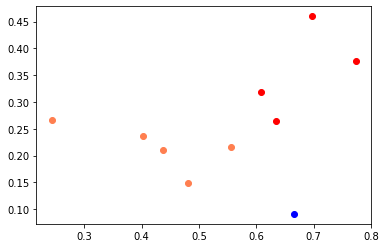

In [240]:
import matplotlib.pyplot as plt
for index, cluster in enumerate(cluster_list):
    if cluster == 1:
        plt.scatter(x_list[index], y_list[index], c='red')
    elif cluster == 2:
        plt.scatter(x_list[index], y_list[index], c='coral')
    else:
        plt.scatter(x_list[index], y_list[index], c='blue')
plt.show()

